# [Titanic Data Set](https://www.kaggle.com/c/titanic/data)

<img src="../images/titanic.jpeg">

### Data Set Information:

The titanic data frame describes the survival status of individual passengers on the Titanic.
The titanic data frame does not contain information for the crew, but it does contain actual and estimated ages for almost 80% of the passengers.

### Sources:
Hind, Philip. Encyclopedia Titanica. Online-only resource. Retrieved 01Feb2012 from
http://www.encyclopedia-titanica.org/

### Attribute Information:

survival:    Survival 
PassengerId: Unique Id of a passenger. 
pclass:    Ticket class     
sex:    Sex     
Age:    Age in years     
sibsp:    # of siblings / spouses aboard the Titanic     
parch:    # of parents / children aboard the Titanic     
ticket:    Ticket number     
fare:    Passenger fare     
cabin:    Cabin number     
embarked:    Port of Embarkation
train_df.describe()

## Exploratory data analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Getting the Data
df = pd.read_csv("../datasets/titanic/train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


- El conjunto de entrenamiento tiene 891 ejemplos y 11 características + la variable objetivo (Survived). 
- 2 de las features son float, 5 son int y 5 son objetos(string). 

### Desbalanceo de las clases

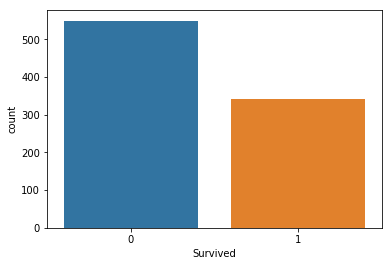

In [5]:
sns.countplot(x='Survived', data=df)

### Visualización de los datos

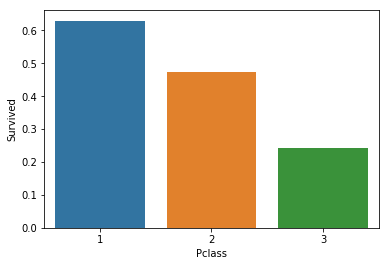

In [6]:
sns.barplot(x='Pclass', y='Survived', data=df, ci=None)

Los pasajeros de primera clase, sobrevivieron más

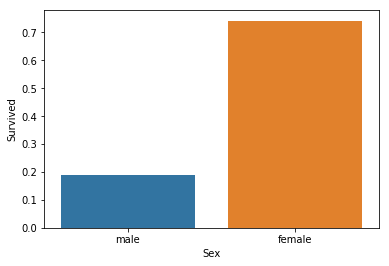

In [7]:
sns.barplot(x = 'Sex', y='Survived', data=df, ci=None)

Las mujeres sobrevivieron más

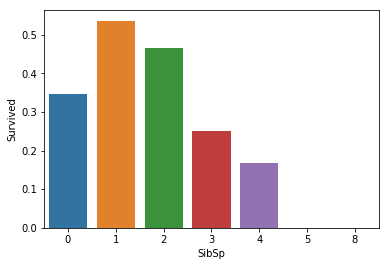

In [8]:
sns.barplot(x="SibSp", y="Survived", data=df, ci=None)

Los pasajeros con uno o dos acompañantes sobrevivieron más

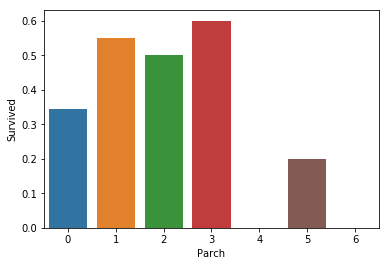

In [9]:
sns.barplot(x="Parch", y="Survived", data=df, ci=None)

Los pasajeros con 1-3 hijos sobrevivieron más

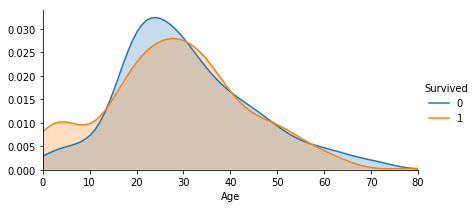

In [10]:
age = sns.FacetGrid(df, hue="Survived",aspect=2)
age.map(sns.kdeplot,'Age',shade= True)
age.set(xlim=(0, df['Age'].max()))
age.add_legend()

Los pasajeros jóvenes sobrevivieron más

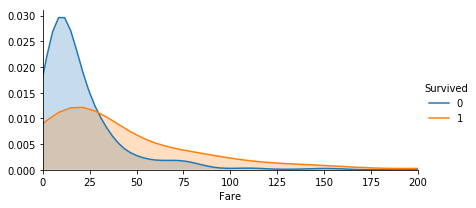

In [11]:
fare = sns.FacetGrid(df, hue="Survived",aspect=2)
fare.map(sns.kdeplot,'Fare',shade= True)
fare.set(xlim=(0, 200))
fare.add_legend()

Los pasajeros que pagaron más, sobrevivieron más

## Preprocesamiento

### Valores nulos

In [12]:
total = df.isnull().sum().sort_values(ascending=False)
percent_1 = df.isnull().sum()/df.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])
missing_data.head(5)

,Total,%
Cabin,687,77.1
Age,177,19.9
Embarked,2,0.2
Fare,0,0.0
Ticket,0,0.0


- La feature `Embarked` tiene solo 2 valores nulos, por lo que se pueden completar fácilmente. 
- La feature `Age` se presenta más complicada, ya que tiene 177 valores nulos. 
- La `Cabin` necesita más investigación, pero parece que podríamos querer eliminarla del conjunto de datos, ya que falta el 77%.

**Embarked**

Como solo tiene 2 valores nulos, los rellenaremos con el más común

In [13]:
from sklearn.impute import SimpleImputer

imp = SimpleImputer(strategy='most_frequent')

df['Embarked'] = imp.fit_transform(df)

In [14]:
df["Embarked"].isnull().sum()

0

**Age**

En este caso crearemos una matriz que contenga números aleatorios, que se calculen en función del valor de la media de la edad y la desviación estándar.

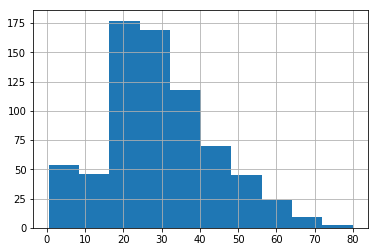

In [15]:
df.Age.hist()

In [16]:
mean = df["Age"].mean()
std = df["Age"].std()
is_null = df["Age"].isnull().sum()

# compute random numbers between the mean, std and is_null
rand_age = np.random.randint(mean - std, mean + std, size = is_null)

# fill NaN values in Age column with random values generated
age_slice = df["Age"].copy()
age_slice[np.isnan(age_slice)] = rand_age

df["Age"] = age_slice
df["Age"] = df["Age"].astype(int)

df["Age"].isnull().sum()

0

**Cabin**

In [17]:
df.Cabin.unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

Vemos que la variable `Cabin` empieza por una letra que, investigando, representa la cubierta en la que se alojaban los pasajeros. Como puede ser interesante, podemos quedarnos solo con la letra y rellenar con otra letra inventada los valores que faltan para quitarnos los nulos

<img src="../images/titanic_cutaway_diagram.png">

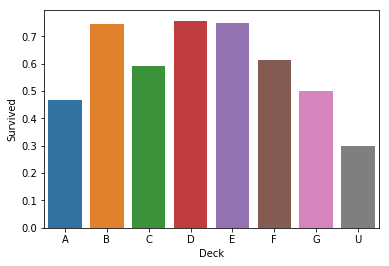

In [18]:
df['Cabin'] = df['Cabin'].fillna("U")
df['Deck'] = df['Cabin'].map(lambda x: x[0])

# sns.catplot("Survived", col="Deck", col_wrap=3,
#             data=titanic[titanic.Deck != 'U'], kind="count")
sns.barplot(x="Deck", y="Survived", data=df, ci=None, order=['A', 'B', 'C', 'D', 'E', 'F', 'G', 'U'])

Ahora podemos borrar el feature `Cabin` ya que es redundante con `Deck`

In [19]:
# we can now drop the cabin feature
df = df.drop(['Cabin'], axis=1)

In [20]:
df["Deck"].isnull().sum()

0

## Detección de outliers

In [21]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Deck
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,1,U
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,2,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,3,U
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,4,C
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,5,U


In [22]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.536476,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.554864,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,21.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


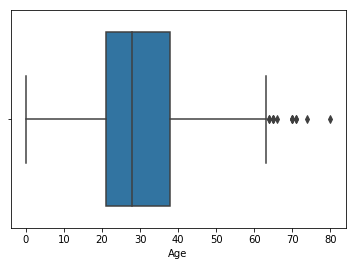

In [23]:
sns.boxplot(x='Age', data=df)

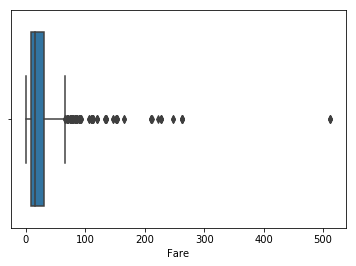

In [ ]:
sns.boxplot(x='Fare', data=df)

Como veíamos en la teoría:
> Un valor atípico (outlier) es un valor de una variable muy distante a otras observaciones de la misma variable
- Errores en los instrumentos de medida
- Picos aleatorios en una variable
- La distribución tiene una cola muy “pesada” (heavily-tailed distribution)
    - **Cuidado con hacer asunciones sobre la normalidad de la distribución**

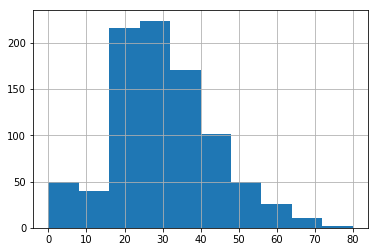

In [ ]:
df.Age.hist()

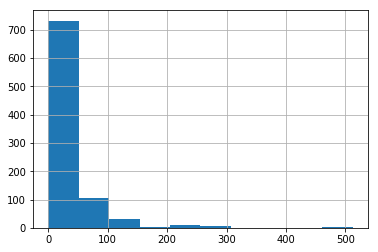

In [ ]:
df.Fare.hist()

## Distintos órdenes de magnitud

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Deck
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,1,U
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,2,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,3,U
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,4,C
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,5,U


Las dos variables numéricas del dataset son `Age` y `Fare`. Ambas están en distintos órdenes de magnitud, así que vamos a normalizarlos

In [ ]:
from sklearn.preprocessing import Normalizer

scaler = Normalizer(norm='l1')
ageAndFare = df[["Age", "Fare"]]

ageAndFare = scaler.fit_transform(ageAndFare)
ageAndFare = pd.DataFrame(ageAndFare, columns = ["age", "fare"])
df['NAge'] = ageAndFare[['age']]
df['NFare'] = ageAndFare[['fare']]

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Deck,NAge,NFare
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,1,U,0.752137,0.247863
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,2,C,0.347720,0.652280
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,3,U,0.766396,0.233604
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,4,C,0.397276,0.602724
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,5,U,0.813008,0.186992


## Datos categóricos

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Deck,NAge,NFare
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,1,U,0.752137,0.247863
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,2,C,0.347720,0.652280
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,3,U,0.766396,0.233604
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,4,C,0.397276,0.602724
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,5,U,0.813008,0.186992


Tenemos como datos categóricos: `Age` & `Deck`

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

df['Deck'] = le.fit_transform(df['Deck'])

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Deck,NAge,NFare
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,1,8,0.752137,0.247863
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,2,2,0.347720,0.652280
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,3,8,0.766396,0.233604
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,4,2,0.397276,0.602724
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,5,8,0.813008,0.186992


In [ ]:
le_sex = LabelEncoder()

df['Sex'] = le_sex.fit_transform(df['Sex'])

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Deck,NAge,NFare
0,1,0,3,"Braund, Mr. Owen Harris",1,22,1,0,A/5 21171,7.2500,1,8,0.752137,0.247863
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38,1,0,PC 17599,71.2833,2,2,0.347720,0.652280
2,3,1,3,"Heikkinen, Miss. Laina",0,26,0,0,STON/O2. 3101282,7.9250,3,8,0.766396,0.233604
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35,1,0,113803,53.1000,4,2,0.397276,0.602724
4,5,0,3,"Allen, Mr. William Henry",1,35,0,0,373450,8.0500,5,8,0.813008,0.186992


## Selección de variables

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Deck,NAge,NFare
0,1,0,3,"Braund, Mr. Owen Harris",1,22,1,0,A/5 21171,7.2500,1,8,0.752137,0.247863
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38,1,0,PC 17599,71.2833,2,2,0.347720,0.652280
2,3,1,3,"Heikkinen, Miss. Laina",0,26,0,0,STON/O2. 3101282,7.9250,3,8,0.766396,0.233604
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35,1,0,113803,53.1000,4,2,0.397276,0.602724
4,5,0,3,"Allen, Mr. William Henry",1,35,0,0,373450,8.0500,5,8,0.813008,0.186992


Primero eliminamos las variables de identificadores, ya que no aportan nada al modelo

In [ ]:
df.drop(['PassengerId', 'Name', 'Ticket', 'Fare', 'Age'], 1, inplace =True)
df.head()

,Survived,Pclass,Sex,SibSp,Parch,Embarked,Deck,NAge,NFare
0,0,3,1,1,0,1,8,0.752137,0.247863
1,1,1,0,1,0,2,2,0.347720,0.652280
2,1,3,0,0,0,3,8,0.766396,0.233604
3,1,1,0,1,0,4,2,0.397276,0.602724
4,0,3,1,0,0,5,8,0.813008,0.186992


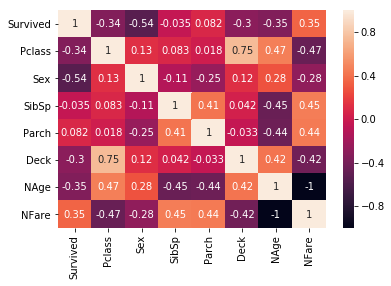

In [ ]:
sns.heatmap(df.corr(), annot=True, cbar=True)

# Entrenando los modelos

In [ ]:
from sklearn.model_selection import train_test_split

X = df.drop("Survived", axis=1)
y = df["Survived"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

logreg = LogisticRegression(solver='liblinear')
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

0.7988826815642458
[[90 15]
 [21 53]]


In [ ]:
from sklearn.model_selection import cross_val_score

logreg = LogisticRegression(solver='liblinear')
scores = cross_val_score(logreg, X_train, y_train, cv=10, scoring = "accuracy")

print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())

Scores: [0.84722222 0.73611111 0.72222222 0.93055556 0.83098592 0.71830986
 0.73239437 0.71830986 0.77142857 0.88571429]
Mean: 0.7893253968253967
Standard Deviation: 0.07436858535543957


## Naïve Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix

gaussian = GaussianNB() 
gaussian.fit(X_train, y_train)  

y_pred = gaussian.predict(X_test)  

print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

0.7653631284916201
[[82 23]
 [19 55]]


In [ ]:
from sklearn.model_selection import cross_val_score

gaussian = GaussianNB() 
scores = cross_val_score(gaussian, X_train, y_train, cv=10, scoring = "accuracy")

print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())

Scores: [0.83333333 0.77777778 0.68055556 0.86111111 0.8028169  0.77464789
 0.73239437 0.74647887 0.68571429 0.82857143]
Mean: 0.7723401520232506
Standard Deviation: 0.05824007029803969


### Decision tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

decision_tree = DecisionTreeClassifier() 
decision_tree.fit(X_train, y_train) 

y_pred = decision_tree.predict(X_test)  

print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

0.7541899441340782
[[88 17]
 [27 47]]


In [ ]:
from sklearn.model_selection import cross_val_score

decision_tree = DecisionTreeClassifier() 
scores = cross_val_score(decision_tree, X_train, y_train, cv=10, scoring = "accuracy")

print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())

Scores: [0.70833333 0.65277778 0.77777778 0.80555556 0.77464789 0.67605634
 0.61971831 0.76056338 0.71428571 0.78571429]
Mean: 0.7275430359937403
Standard Deviation: 0.05976140197898983


## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)

y_pred = random_forest.predict(X_test)

print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

0.7877094972067039
[[93 12]
 [26 48]]


In [ ]:
from sklearn.model_selection import cross_val_score

rf = RandomForestClassifier(n_estimators=100)
scores = cross_val_score(rf, X_train, y_train, cv=10, scoring = "accuracy")

print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())

Scores: [0.80555556 0.79166667 0.76388889 0.86111111 0.8028169  0.76056338
 0.71830986 0.8028169  0.7        0.87142857]
Mean: 0.7878157835904315
Standard Deviation: 0.05196226935310595


In [ ]:
importances = pd.DataFrame({'feature':X_train.columns,'importance':np.round(random_forest.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
importances.head(15)

,importance
feature,
Sex,0.235
NAge,0.201
NFare,0.182
Embarked,0.175
Pclass,0.068
Deck,0.058
SibSp,0.049
Parch,0.031


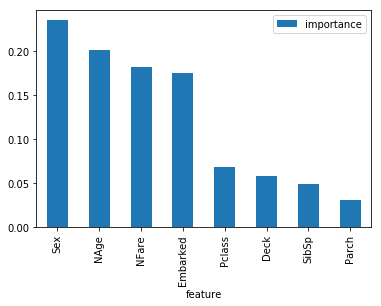

In [ ]:
importances.plot.bar()

### Support Vector Machine

In [ ]:
from sklearn.svm import SVC, LinearSVC
from sklearn.metrics import accuracy_score, confusion_matrix

linear_svc = LinearSVC(max_iter=1000000)
linear_svc.fit(X_train, y_train)

y_pred = linear_svc.predict(X_test)

print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

In [ ]:
from sklearn.model_selection import cross_val_score

linear_svc = LinearSVC()
scores = cross_val_score(linear_svc, X_train, y_train, cv=10, scoring = "accuracy")

print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())

## K Nearest Neighbor

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

knn = KNeighborsClassifier(n_neighbors = 3) 
knn.fit(X_train, y_train)  

y_pred = knn.predict(X_test)  

print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

In [ ]:
from sklearn.model_selection import cross_val_score

knn = KNeighborsClassifier(n_neighbors = 3) 
scores = cross_val_score(knn, X_train, y_train, cv=10, scoring = "accuracy")

print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())

In [ ]:
# experimenting with different n values
k_range = list(range(1,26))
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(accuracy_score(y_test, y_pred))
    
plt.plot(k_range, scores)
plt.xlabel('Value of k for KNN')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores for Values of k of k-Nearest-Neighbors')
plt.show()